This notebook demonstrates and explains the purpose of `GEMprospector` by loading and 
examining a gene expression matrix and some feature / gene selection results.


More specifically, the following will be demonstrated and explained:
+ The core data models:
    + `AnnotatedGEM` stores a count matrix and associated labels.
    + `Lineament` stores gene / feature selection results and their associated scores.
    + `LineamentCollection` acts as an interface to work with an `AnnotatedGEM` and its associated `Lineament` objects.
+ GEMprpsopector's interface object:
    + Common programatic access to `AnnotatedGEM` and `LineamentCollection`.
    + Accessing the GEM and subsets thereof.
    + Visualzing the GEM and the gene selections.

---

***Setting up the notebook***

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
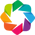

/home/tyler/anaconda3/envs/GeneProspector/lib/python3.7/site-packages/tqdm/autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [1]:
import numpy as np
from pathlib import Path
import holoviews as hv
hv.extension("bokeh")
%matplotlib inline
import seaborn as sns
sns.set()

import GEMprospector as gp

In [2]:
# Suppress numba warnings.
import warnings
warnings.filterwarnings('ignore')

***Declaring paths used***

For convenience the paths used in this notebook are declared here:

In [3]:
ANNOTATED_GEM_PATH = "~/GEMprospector_demo_data/osativa.nc"
LINEAMENT_DIR = "~/GEMprospector_demo_data/lineaments/"

In [4]:
Path(ANNOTATED_GEM_PATH).expanduser().exists() and Path(LINEAMENT_DIR).expanduser().exists()

True

## Loading an AnnotatedGEM

For a guide on how to get your data into an `AnnotatedGEM` object, see [Creating an AnnotatedGEM](LINKME).

For now we will load a previously created one, which has been saved as a netcdf (.nc) file.

In [5]:
%%time
agem = gp.AnnotatedGEM(ANNOTATED_GEM_PATH, name="Oryza sativa")

CPU times: user 88.3 ms, sys: 20.4 ms, total: 109 ms
Wall time: 123 ms


In a jupyter notebook (or lab) you should see a short summary of the `AnnotatedGEM` object.

In [6]:
agem

<GEMprospector.AnnotatedGEM>
Name: Oryza sativa
Selected GEM Variable: 'counts'
    Gene   55986
    Sample 475

For a more detailed look at the data within this `AnnotatedGEM`, recall that this object is a light wrapper around an `xarray.Dataset` object, accessible by the `.data` attribute.

In [7]:
agem.data

<xarray.Dataset>
Dimensions:     (Gene: 55986, Sample: 475)
Coordinates:
  * Gene        (Gene) object 'LOC_Os06g05820' ... 'LOC_Os07g03418'
  * Sample      (Sample) object 'SRX1423934' 'SRX1423935' ... 'SRX1424408'
Data variables:
    SampleSRR   (Sample) object ...
    Treatment   (Sample) object ...
    Time        (Sample) int64 ...
    Tissue      (Sample) object ...
    Genotype    (Sample) object ...
    Subspecies  (Sample) object ...
    counts      (Sample, Gene) int64 ...
    lengths     (Gene) float64 ...
Attributes:
    all_labels:                           ['SampleSRR', 'Treatment', 'Time', ...
    discrete:                             ['SampleSRR', 'Treatment', 'Tissue'...
    continuous:                           ['SampleSRR', 'Time']
    quantile:                             ['Treatment', 'Tissue', 'Genotype',...
    incomplete:                           []
    __GEMprospector.AnnotatedGEM.params:  {"count_array_name": "counts", "gen...

---

## Loading a LineamentCollection

+ `LineamentCollection` contains an `AnnotatedGEM` and `Lineament` objects that reference it.
+ `Lineament` is a light wrapper object for an `xarray.Dataset` that contains the results of some
procedure used to select or rank genes.

In a normal workflow you would have to use an `AnnotatedGEM` to generate sets of genes of interest -- termed `Lineaments`.
In this case we will load some previously created results.

Here we load a collection of `Lineament` objects from a folder as a `LineamentCollection`.

In [8]:
lcoll = gp.LineamentCollection.from_folder(gem=agem, target_dir=LINEAMENT_DIR, 
                                           name="Oryza Sativa Demo Collection")

As before, some summary information is displayed upon entering the object in a notebook:

In [9]:
lcoll

<GEMprospector.LineamentCollection>
    <GEMprospector.AnnotatedGEM>
    Name: Oryza sativa
    Selected GEM Variable: 'counts'
        Gene   55986
        Sample 475
Lineament Keys and # of Selected Genes
    Treatment: 1171
    Genotype: 754
    Subspecies: 312

#### Acessing an individual `Lineament`

We can examine an individual `Lineament` within the collection:

In [10]:
lcoll.lineaments['Treatment']

<GEMprospector.Lineament>
Name: Treatment
    Lineament Target: 'Treatment'
    Supported Genes:  1171, 2.09% of 55986

As well as its associated `data` attribute.

In [11]:
lcoll.lineaments['Treatment'].data

<xarray.Dataset>
Dimensions:  (Gene: 55986)
Coordinates:
  * Gene     (Gene) object 'LOC_Os06g05820' ... 'LOC_Os07g03418'
Data variables:
    support  (Gene) bool False False False False ... True False False False
Attributes:
    boruta_model:                      {"n_estimators": 1000, "perc": 100, "e...
    ranking_model:                     {"bootstrap": true, "class_weight": nu...
    x_variable:                        counts
    y_variables:                       Treatment
    __GEMprospector.Lineament.params:  {"name": "Treatment", "support_index_n...

The `AnnotatedGEM` object is stored as the `gem` attribute.

In [12]:
lcoll.gem

<GEMprospector.AnnotatedGEM>
Name: Oryza sativa
Selected GEM Variable: 'counts'
    Gene   55986
    Sample 475

---

## Analyzing and Viewing AnnotatedGEM and LineamentCollections

### Accessing Data

Fundamentaly all of our analysis starts with getting our count data (or some subset, transform or mask thereof)
along with any needed annotations in a form that is compatable with our chosen method.

Consider the `get_data` function, which returns a tuple of (counts, target) data.

In [13]:
gp.get_data(agem)

(<xarray.DataArray 'counts' (Sample: 475, Gene: 55986)>
 array([[ 20,   0,   0, ...,   0, 637,   0],
        [  2,   0,   0, ...,   0, 186,   0],
        [ 22,   0,   0, ...,   0, 545,   0],
        ...,
        [  8,   0,   0, ...,   0, 411,   0],
        [  8,   0,   0, ...,   0, 311,   0],
        [ 21,   0,   0, ...,   0, 666,   0]])
 Coordinates:
   * Gene     (Gene) object 'LOC_Os06g05820' ... 'LOC_Os07g03418'
   * Sample   (Sample) object 'SRX1423934' 'SRX1423935' ... 'SRX1424408', None)

A target variable can also be specified:

In [14]:
counts, treatments = gp.get_data(agem, y_variables="Treatment", count_mask="masked")

In [15]:
counts[:5]

<xarray.DataArray 'counts' (Sample: 5, Gene: 55986)>
array([[ 20.,  nan,  nan, ...,  nan, 637.,  nan],
       [  2.,  nan,  nan, ...,  nan, 186.,  nan],
       [ 22.,  nan,  nan, ...,  nan, 545.,  nan],
       [ 11.,  nan,  nan, ...,  nan, 157.,  nan],
       [ 23.,  nan,  nan, ...,  nan, 615.,  nan]])
Coordinates:
  * Gene     (Gene) object 'LOC_Os06g05820' ... 'LOC_Os07g03418'
  * Sample   (Sample) object 'SRX1423934' 'SRX1423935' ... 'SRX1423938'

In [16]:
treatments[:5]

<xarray.DataArray 'Treatment' (Sample: 5)>
array(['CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL'],
      dtype=object)
Coordinates:
  * Sample   (Sample) object 'SRX1423934' 'SRX1423935' ... 'SRX1423938'

### Masking, Dropping or Complete

By default, `get_data()` will return the "masked" count matrix, meaning all genes with zero values have been omited.
This returns a tuple, although it can be difficult to notice the final `None` that represents the (unrequested) y values.

There are a few forms of the gene expression matrix that are available depending on the researchers needs:

+ complete (default)
+ masked
+ dropped

In [17]:
gp.get_data(agem, count_mask="masked")

(<xarray.DataArray 'counts' (Sample: 475, Gene: 55986)>
 array([[ 20.,  nan,  nan, ...,  nan, 637.,  nan],
        [  2.,  nan,  nan, ...,  nan, 186.,  nan],
        [ 22.,  nan,  nan, ...,  nan, 545.,  nan],
        ...,
        [  8.,  nan,  nan, ...,  nan, 411.,  nan],
        [  8.,  nan,  nan, ...,  nan, 311.,  nan],
        [ 21.,  nan,  nan, ...,  nan, 666.,  nan]])
 Coordinates:
   * Gene     (Gene) object 'LOC_Os06g05820' ... 'LOC_Os07g03418'
   * Sample   (Sample) object 'SRX1423934' 'SRX1423935' ... 'SRX1424408', None)

The `get_data()` operator works on `LineamentCollection` objects as well, this allows us to pass `lineament_keys` and only retrieve the genes supported by those lineaments.

If no `lineament_keys` are provided, all of the genes are returned (as with the `AnnotatedGEM`).

In [18]:
gp.get_data(lcoll, lineament_keys=['Treatment'], count_mask="masked")

(<xarray.DataArray 'counts' (Sample: 475, Gene: 1171)>
 array([[   6.,  912.,  793., ...,   17., 4399.,  810.],
        [  nan,  249.,  193., ...,    7.,  553.,  340.],
        [   6.,  931.,  850., ...,    7., 2447., 1134.],
        ...,
        [  14.,  155.,  709., ...,   nan, 2033.,  445.],
        [  nan,  213.,  612., ...,   10., 3082.,  659.],
        [   5.,  195.,  555., ...,   12., 1811., 1121.]])
 Coordinates:
   * Gene     (Gene) object 'LOC_Os02g56120' ... 'LOC_Os01g21250'
   * Sample   (Sample) object 'SRX1423934' 'SRX1423935' ... 'SRX1424408', None)

---

## Analyzing and Viewing AnnotatedGEM and LineamentCollections

With our data loaded into GEMprospector's models and an understanding of `get_data`, we are now ready to begin visualizing and analyzing our results.

### Vizualizing an AnnotatedGEM

Due to the size and depth of information contained, directly 'viewing' a gene expression matrix does not usually yield any detailed insights, but this can be an important step in determining which normalization methods should be considered.

### Sample Distribution Plots

It is normal to view the data after a log transform, as the distribution of ranges make the raw value plots difficult to interpret.

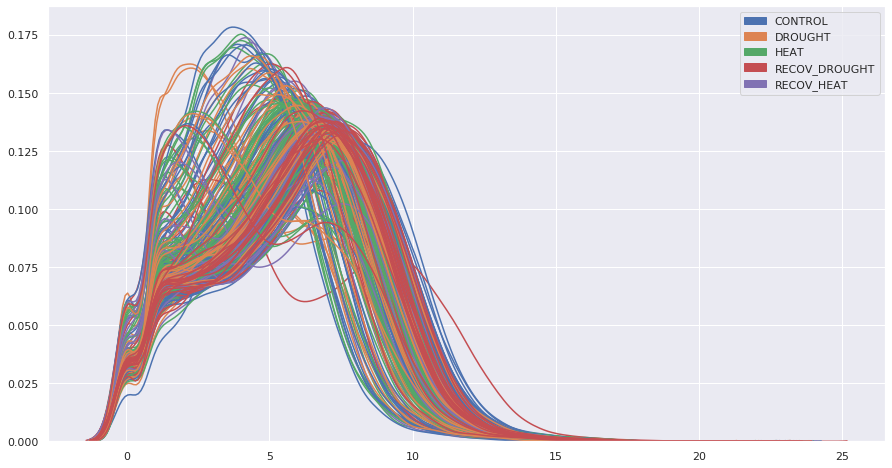

In [19]:
genotype_counts, genotype = gp.get_data(lcoll, y_variables="Treatment")
ax = gp.plots.np_sample_distributions(np.log2(genotype_counts.values), genotype.values)

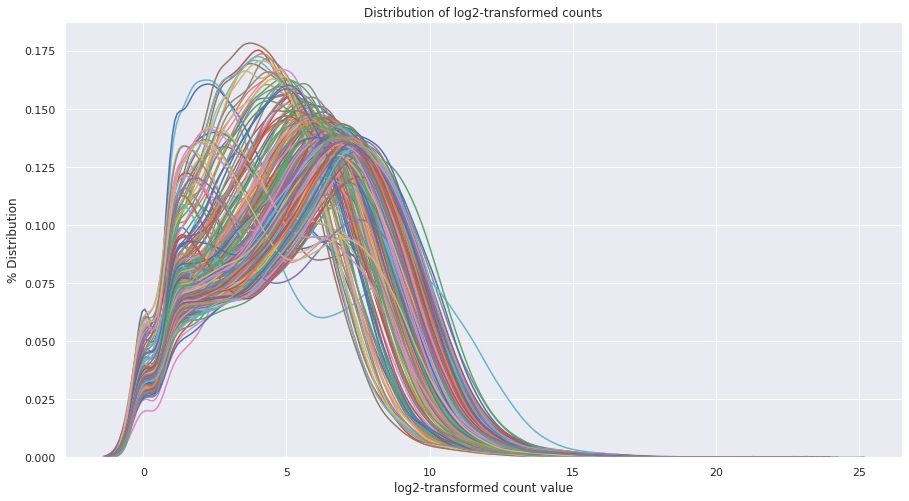

In [20]:
ax = gp.plots.np_sample_distributions(np.log2(counts.values))
ax.set_title("Distribution of log2-transformed counts");
ax.set_ylabel("% Distribution");
ax.set_xlabel("log2-transformed count value");

### Raster of the GEM

An extremely high-level view of the raw data. Not very usefull, but fun to look at.

If this cell is run on a live notebook, the view will update itself upon zooming in.

In [22]:
gp.plots.datashade_gem(agem.data.counts).opts(title="Datashaded Raster of the entire GEM")

:DynamicMap   []
   :RGB   [x,y]   (R,G,B,A)

### Visualizing LineamentCollections

When we filter down the number of genes however, we can begin to see some clearer paterns:

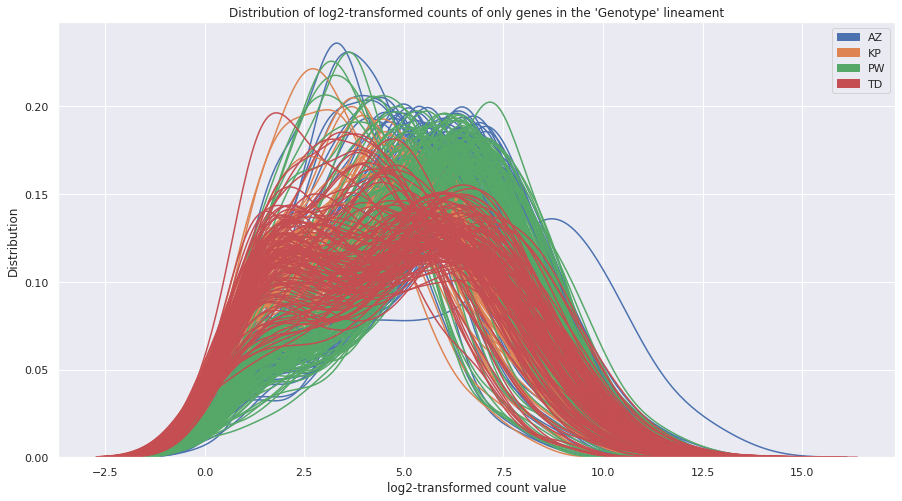

In [23]:
genotype_counts, genotype = gp.get_data(lcoll, lineament_keys=["Genotype"], y_variables="Genotype")

ax = gp.plots.np_sample_distributions(np.log2(genotype_counts.values), genotype.values)
ax.set_title("Distribution of log2-transformed counts of only genes in the 'Genotype' lineament");
ax.set_ylabel("Distribution");
ax.set_xlabel("log2-transformed count value");

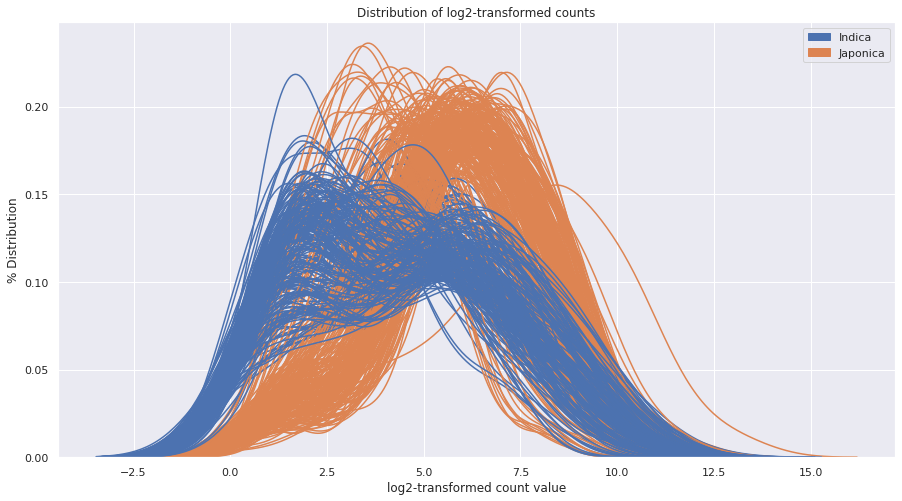

In [25]:
genotype_counts, genotype = gp.get_data(lcoll, lineament_keys=["Subspecies"], y_variables="Subspecies")

ax = gp.plots.np_sample_distributions(np.log2(genotype_counts.values), genotype.values)
ax.set_title("Distribution of log2-transformed counts");
ax.set_ylabel("% Distribution");
ax.set_xlabel("log2-transformed count value");

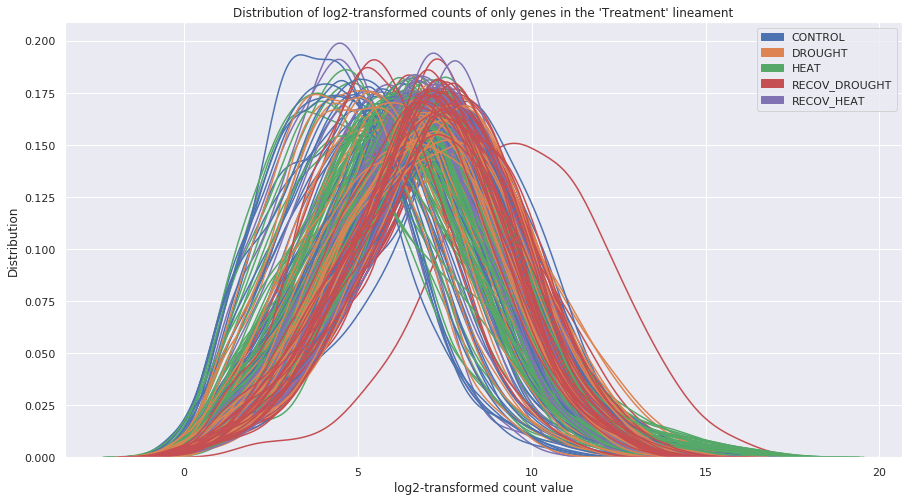

In [26]:
treatment_counts, treatments = gp.get_data(lcoll, lineament_keys=["Treatment"], y_variables="Treatment")

ax = gp.plots.np_sample_distributions(np.log2(treatment_counts.values), treatments.values)
ax.set_title("Distribution of log2-transformed counts of only genes in the 'Treatment' lineament");
ax.set_ylabel("Distribution");
ax.set_xlabel("log2-transformed count value");

The same is true of the raster.

However, since we are now viewing a much smaller number of genes, we can directly view the data with `hv.Image()`.

In [32]:
counts, treatment = gp.get_data(lcoll, y_variables="Subspecies", lineament_keys=["Subspecies"], count_mask="masked", count_transform=lambda counts: np.log2(counts))
gp.plots.colorized_raster(counts, treatment).opts(title="Raster of Subspecies-specific Genes")

:NdOverlay   [Element]
   :Image   [x,y]   (z)

### Mean vs Variance

In [23]:
x, _ = gp.get_data(lcoll, count_mask="masked")
gp.plots.mean_vs_variance(np.log2(x), mappings=lcoll.as_dict())

:AdjointLayout
   :NdOverlay   [Element]
      :Points   [Mean,Variance]
   :NdOverlay   [Element]
      :Area   [Variance]   (Variance_density)
   :NdOverlay   [Element]
      :Area   [Mean]   (Mean_density)

In [31]:
gp.plots.lineament_overlap_heatmap(lcoll)

:Overlay
   .HeatMap.I :HeatMap   [x,y]   (Overlap Count)
   .Labels.I  :Labels   [x,y]   (Overlap Count)

### UMAP

Uniform Manifold Approximation and Projection (UMAP) is a powerfull tool for dimensioal reduction.

In this case we will view the fuzzy topological structure of the entire GEM, and compare them to subsets of that GEM.

[UMAP Documentation](https://umap-learn.readthedocs.io/en/latest/)

In [37]:
complete_umap = gp.panels.UMAP_Panel(lcoll, hue="Treatment").view().opts(title="Complete GEM")
treatment_sel_umap = gp.panels.UMAP_Panel(lcoll, mapping_selector=["Treatment"], hue="Treatment").view().opts(title="Treatment-Subset GEM")

complete_umap + treatment_sel_umap

:Layout
   .Points.I  :Points   [x,y]   (SampleSRR,Treatment,Time,Tissue,Genotype,Subspecies)
   .Points.II :Points   [x,y]   (SampleSRR,Treatment,Time,Tissue,Genotype,Subspecies)

In a live notebook you can also use an interactive UMAP [panel](https://panel.pyviz.org/) application.

In [38]:
gp.panels.UMAP_Panel(lcoll, mapping_selector=["Genotype"]).panel()

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Row
            [0] ParamMethod(method)
            [1] Param(UMAP_Panel, widgets={'update_umap': {...})
    [1] Markdown(str, width=800)

---

## Next Steps and Other Features

This notebook demonstrated the core data models and methods of accessing that data.
It also covered some general visualizations.
If you have made it this far, you may also be interested in:
+ Selecing genes with boruta_py or methods.
+ Judging or analyzing selected genes.